## Sample_res_geosmin data model development

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

In [2]:
#reservoir sampling geosmin entries
sample_res_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/sample_res_geosmin.csv')

sample_res_geosmin = sample_res_geosmin.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE','DEPTH'])

#split sample_res_geosmin into three different dataframes based on the target differentiation
sample_res_geosmin_MLOWH = sample_res_geosmin[sample_res_geosmin['Target'] == 'MLOWH']
sample_res_geosmin_MLOWM = sample_res_geosmin[sample_res_geosmin['Target'] == 'MLOWM']
sample_res_geosmin_MLOWL = sample_res_geosmin[sample_res_geosmin['Target'] == 'MLOWL']

#### Import the following dataframes that were compiled previously:
1. df_final_wo_nut - this is the datafile with the following categories: 
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'.

 2. df_full - this is the nutrient concentration from 10/3/2019 to 6/30/2022 that will be added to df_final_wo_nut to make df_final_w_nut.
 Has the following categories: 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'.

 3. a split dataframe between different targets

In [3]:
sample_res_geosmin_MLOWM

,SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target,Date
0,RS-MR-01-5,26.69,ng/L,MLOWM,7/2/2012
1,RS-MR-01-5,4.64,ng/L,MLOWM,7/10/2012
2,RS-MR-01-5,24.63,ng/L,MLOWM,7/18/2012
3,RS-MR-01-5,62.66,ng/L,MLOWM,7/25/2012
5,RS-MR-01-5,17.40,ng/L,MLOWM,7/30/2012
...,...,...,...,...,...
252,RS-MR-01-A-10,5.00,ng/L,MLOWM,3/3/2020
254,RS-MR-01-I-4,2.00,ng/L,MLOWM,4/21/2020
255,RS-MR-01-B-11,2.00,ng/L,MLOWM,4/21/2020
256,RS-MR-01-I-4,14.00,ng/L,MLOWM,10/16/2020


In [4]:
df_final_wo_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_final_wo_nut.csv')
df_full = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_full.csv')

df_final_wo_nut = df_final_wo_nut.drop(columns = ['Unnamed: 0'])
df_full = df_full.drop(columns = ['Unnamed: 0'])


#reset index and set new index to "date" for both major dataframes
df_final_wo_nut.reset_index(drop=True, inplace=True)
df_final_wo_nut = df_final_wo_nut.set_index(["Date"])

df_full.reset_index(drop=True, inplace=True)
df_full = df_full.set_index(["Date"])

sample_res_geosmin_MLOWH.reset_index(drop=True, inplace=True)
sample_res_geosmin_MLOWH = sample_res_geosmin_MLOWH.rename(columns = {'Date ':'Date'})
sample_res_geosmin_MLOWH = sample_res_geosmin_MLOWH.set_index(['Date'])

sample_res_geosmin_MLOWM.reset_index(drop=True, inplace=True)
sample_res_geosmin_MLOWM = sample_res_geosmin_MLOWM.rename(columns = {'Date ':'Date'})
sample_res_geosmin_MLOWM = sample_res_geosmin_MLOWM.set_index(['Date'])

sample_res_geosmin_MLOWL.reset_index(drop=True, inplace=True)
sample_res_geosmin_MLOWL = sample_res_geosmin_MLOWL.rename(columns = {'Date ':'Date'})
sample_res_geosmin_MLOWL = sample_res_geosmin_MLOWL.set_index(['Date'])

#merge between sample reservoir geosmin concentration values and dataframe without nutrient concentrations to only get values from dates
result_wo_nut_MLOWL = pd.merge(df_final_wo_nut, sample_res_geosmin_MLOWL, on= "Date")
result_wo_nut_MLOWM = pd.merge(df_final_wo_nut, sample_res_geosmin_MLOWM, on= "Date")
result_wo_nut_MLOWH = pd.merge(df_final_wo_nut, sample_res_geosmin_MLOWH, on= "Date")


In [5]:
df_final_wo_nut

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)"
Date,,,,,,,,,,,
6/1/2012,0.276317,27.8,4.828314,5.416100,263.250000,26.111111,6.624953,7.993122,9.047652,4.574711,22.777778
6/2/2012,0.275352,27.8,4.812184,5.416100,263.250000,26.666667,6.624953,7.993122,9.047652,4.574711,27.222222
6/3/2012,0.276317,31.1,4.795791,5.416100,263.250000,28.888889,6.759438,8.104937,9.047652,4.564869,23.888889
6/4/2012,0.280316,32.2,4.828314,5.416100,247.100000,28.888889,6.559726,7.939144,9.047652,4.563410,31.111111
6/5/2012,0.280522,28.3,4.867534,5.416100,218.679167,27.777778,6.613622,7.983733,9.047652,4.566221,31.666667
...,...,...,...,...,...,...,...,...,...,...,...
6/26/2022,0.177439,19.4,4.736198,4.351567,329.666700,28.333333,10.614613,10.614613,8.468176,5.686975,18.333333
6/27/2022,0.185367,30.6,4.955827,4.346399,382.708300,31.666667,9.313968,9.313968,8.147392,5.497168,18.333333
6/28/2022,0.187791,33.9,5.081404,4.342506,390.750000,31.111111,9.041018,9.041018,8.850424,5.459586,28.888889


In [6]:
result_wo_nut_MLOWM

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)",SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target
Date,,,,,,,,,,,,,,,
7/2/2012,0.274779,35.6,4.521789,5.703782,357.300000,33.888889,12.078079,12.840561,11.325635,5.241959,35.555556,RS-MR-01-5,26.69,ng/L,MLOWM
7/10/2012,0.266220,28.9,5.433722,5.111988,90.706250,27.222222,12.462744,13.203030,8.148006,5.320764,25.555556,RS-MR-01-5,4.64,ng/L,MLOWM
7/18/2012,0.257162,35.0,5.433722,5.805135,306.000000,31.666667,10.185774,11.079260,9.733961,5.060504,30.555556,RS-MR-01-5,24.63,ng/L,MLOWM
7/25/2012,0.212645,30.0,5.517453,5.616771,306.000000,27.777778,11.391225,12.196721,11.325635,5.450137,33.333333,RS-MR-01-5,62.66,ng/L,MLOWM
7/30/2012,0.261535,29.4,5.384495,5.398163,263.725000,31.111111,11.899160,11.899160,10.605659,5.309109,32.222222,RS-MR-01-5,17.40,ng/L,MLOWM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/3/2020,0.315309,15.6,3.497289,5.111988,2.000000,14.444444,0.300000,0.300000,8.232861,3.610918,10.000000,RS-MR-01-A-10,5.00,ng/L,MLOWM
4/21/2020,0.328926,17.2,4.709530,5.262690,2.000000,18.333333,8.166395,8.166395,6.994283,4.454347,17.222222,RS-MR-01-I-4,2.00,ng/L,MLOWM
4/21/2020,0.328926,17.2,4.709530,5.262690,2.000000,18.333333,8.166395,8.166395,6.994283,4.454347,17.222222,RS-MR-01-B-11,2.00,ng/L,MLOWM


/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


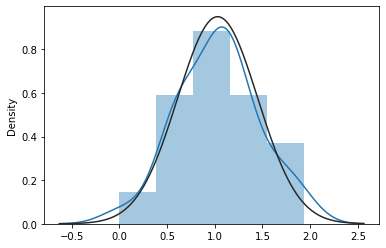

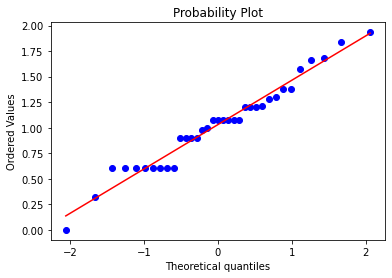

In [7]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt
import math

p_MLOWL = result_wo_nut_MLOWL['FORMATTED_ENTRY'] #path
p_MLOWM = result_wo_nut_MLOWM['FORMATTED_ENTRY']
p_MLOWH = result_wo_nut_MLOWH['FORMATTED_ENTRY']

transformed_data_MLOWL, best_lambda_MLOWL = boxcox(p_MLOWL)
transformed_data_MLOWM, best_lambda_MLOWM = boxcox(p_MLOWM)
transformed_data_MLOWH, best_lambda_MLOWH = boxcox(p_MLOWH)

sns.distplot(transformed_data_MLOWL, hist=True, kde=True, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed_data_MLOWL, plot=plt)

In [8]:
#implement transformation 
result_wo_nut_MLOWL['FORMATTED_ENTRY'] = transformed_data_MLOWL
result_wo_nut_MLOWM['FORMATTED_ENTRY'] = transformed_data_MLOWM
result_wo_nut_MLOWH['FORMATTED_ENTRY'] = transformed_data_MLOWH

x_names = result_wo_nut_MLOWL.columns.values.tolist()

In [9]:
df_full['Adjusted TP, MS above Conf.'] = df_full['Adjusted TP, MS above Conf.'] + 1
df_full['Adjusted turbidity, MS above Conf.'] = df_full['Adjusted turbidity, MS above Conf.'] + 1
df_full['Adjusted TP, NF Above Conf.'] = df_full['Adjusted TP, NF Above Conf.'] + 1
df_full['Adjusted turbidity, NF Above Conf.'] = df_full['Adjusted turbidity, NF Above Conf.'] + 1.5
df_full['Adjusted TP, Downstream Strontia'] = df_full['Adjusted TP, Downstream Strontia'] + 1
df_full['Adjusted turbidity, Downstream Strontia'] = df_full['Adjusted turbidity, Downstream Strontia'] + 1.437
df_full['Adjusted TP, Upstream Strontia'] = df_full['Adjusted TP, Upstream Strontia'] + 1
df_full['Adjusted turbidity, Upstream Strontia'] = df_full['Adjusted turbidity, Upstream Strontia'] + 1
df_full['Adjusted TP, SP Below Chatfield'] = df_full['Adjusted TP, SP Below Chatfield'] + 1
df_full['Adjusted turbidity, SP Below Chatfield'] = df_full['Adjusted turbidity, SP Below Chatfield'] + 2.5

#transformations
df_full['Adjusted TOC, MS above Conf.'] = np.log(df_full['Adjusted TOC, MS above Conf.'])
df_full['Adjusted TP, MS above Conf.'] = np.log(df_full['Adjusted TP, MS above Conf.'])
df_full['Adjusted turbidity, MS above Conf.'] = np.sqrt(df_full['Adjusted turbidity, MS above Conf.'])

df_full['Adjusted TOC, NF Above Conf.'] = np.log(df_full['Adjusted TOC, NF Above Conf.'])
df_full['Adjusted TP, NF Above Conf.'] = np.log(df_full['Adjusted TP, NF Above Conf.'])
df_full['Adjusted turbidity, NF Above Conf.'] = np.log(df_full['Adjusted turbidity, NF Above Conf.'])

df_full['Adjusted TOC, Downstream Strontia'] = np.log(df_full['Adjusted TOC, Downstream Strontia'])
df_full['Adjusted TP, Downstream Strontia'] = np.sqrt(df_full['Adjusted TP, Downstream Strontia'])
df_full['Adjusted turbidity, Downstream Strontia'] = np.log(df_full['Adjusted turbidity, Downstream Strontia'])

df_full['Adjusted TOC, Upstream Strontia'] = np.sqrt(df_full['Adjusted TOC, Upstream Strontia'])
df_full['Adjusted TP, Upstream Strontia'] = np.log(df_full['Adjusted TP, Upstream Strontia'])
df_full['Adjusted turbidity, Upstream Strontia'] = np.sqrt(df_full['Adjusted turbidity, Upstream Strontia'])

df_full['Adjusted TOC, SP Below Chatfield'] = np.sqrt(df_full['Adjusted TOC, SP Below Chatfield'])
# dropping Adjusted TP below chatfield - transformation not really possible 
df_full['Adjusted turbidity, SP Below Chatfield'] = np.log(df_full['Adjusted turbidity, SP Below Chatfield'])

### MLOWL

In [10]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_wo_nut_MLOWL = result_wo_nut_MLOWL[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

x_vals_wo_nut_MLOWL = StandardScaler().fit_transform(x_vals_wo_nut_MLOWL)
y_vals_wo_nut_MLOWL = result_wo_nut_MLOWL[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut_MLOWL, y_vals_wo_nut_MLOWL)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x_vals_wo_nut_MLOWL) # adding a constant
 
model = sm.OLS(y_vals_wo_nut_MLOWL, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.03083812]
Coefficients: 
 [[ 0.29154508 -0.03473075 -0.01752503  0.02157707  0.05385879 -0.13582245
   0.41208124 -0.33316888 -0.07510777  0.07492049  0.13853264]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     1.678
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.142
Time:                        11:51:58   Log-Likelihood:                -8.9737
No. Observations:                  35   AIC:                             41.95
Df Residuals:                      23   BIC:                             60.61
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std e

In [11]:
#make a copy of df_final_wo_nut as (with) nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

df_full_val_w_nut_MLOWL = pd.merge(df_final_w_nut, df_full, on= "Date")
result_w_nut_samp_res_MLOWL = pd.merge(df_full_val_w_nut_MLOWL, sample_res_geosmin_MLOWL, on= "Date")

# seems to only be 1 entry that could be used in comparing with the nutrient data

In [12]:
x_names_w_nut_MLOWL = result_w_nut_samp_res_MLOWL.columns.values.tolist()

### MLOWM

In [13]:
x_vals_wo_nut_MLOWM = result_wo_nut_MLOWM[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

x_vals_wo_nut_MLOWM = StandardScaler().fit_transform(x_vals_wo_nut_MLOWM)
y_vals_wo_nut_MLOWM = result_wo_nut_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut_MLOWM, y_vals_wo_nut_MLOWM)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_MLOWM = sm.add_constant(x_vals_wo_nut_MLOWM) # adding a constant
 
model = sm.OLS(y_vals_wo_nut_MLOWM, x_MLOWM).fit()
predictions = model.predict(x_MLOWM) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.66780559]
Coefficients: 
 [[ 1.41030287e-01 -1.74785684e-04 -8.59800157e-02  9.00828250e-02
   2.06386280e-01  7.29966967e-02 -7.04737894e-01  9.05480202e-01
  -2.54153679e-01 -7.53201063e-02 -8.72118389e-02]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.379
Date:                Thu, 22 Dec 2022   Prob (F-statistic):            0.00966
Time:                        11:51:59   Log-Likelihood:                -200.06
No. Observations:                 162   AIC:                             424.1
Df Residuals:                     150   BIC:                             461.2
Df Model:                          11                                         
Covariance Type:            nonrobust                          

In [14]:
#make a copy of df_final_wo_nut as (with) nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

df_full_val_w_nut_MLOWM = pd.merge(df_final_w_nut, df_full, on= "Date")
result_w_nut_samp_res_MLOWM = pd.merge(df_full_val_w_nut_MLOWM, sample_res_geosmin_MLOWM, on= "Date")

In [15]:
result_w_nut_samp_res_MLOWM

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),...,"Adjusted TOC, Upstream Strontia","Adjusted TP, Upstream Strontia","Adjusted turbidity, Upstream Strontia","Adjusted TOC, SP Below Chatfield","Adjusted TP, SP Below Chatfield","Adjusted turbidity, SP Below Chatfield",SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Target
Date,,,,,,,,,,,,,,,,,,,,,
10/15/2019,0.284122,15.6,4.142880,3.916015,119.087500,14.444444,9.650389,9.650389,12.724386,4.859812,...,1.549806,0.006952,1.516575,2.068082,1.019514,1.873867,RS-MR-01-A-8,27.0,ng/L,MLOWM
10/15/2019,0.284122,15.6,4.142880,3.916015,119.087500,14.444444,9.650389,9.650389,12.724386,4.859812,...,1.549806,0.006952,1.516575,2.068082,1.019514,1.873867,RS-MR-01-I-8,48.0,ng/L,MLOWM
10/22/2019,0.312398,18.3,4.005188,4.300003,138.562500,17.777778,0.300000,0.300000,2.123676,3.688879,...,1.516941,0.004544,1.516575,2.106710,1.020234,1.660733,RS-MR-01-A-4,34.0,ng/L,MLOWM
10/22/2019,0.312398,18.3,4.005188,4.300003,138.562500,17.777778,0.300000,0.300000,2.123676,3.688879,...,1.516941,0.004544,1.516575,2.106710,1.020234,1.660733,RS-MR-01-A-8,27.0,ng/L,MLOWM
10/22/2019,0.312398,18.3,4.005188,4.300003,138.562500,17.777778,0.300000,0.300000,2.123676,3.688879,...,1.516941,0.004544,1.516575,2.106710,1.020234,1.660733,RS-MR-01-A-12,32.0,ng/L,MLOWM
1/7/2020,0.290005,14.4,2.606315,5.099866,2.000000,12.777778,0.300000,0.300000,2.123676,3.526361,...,1.673320,0.000000,1.360147,1.923538,1.017000,1.629241,RS-MR-01-A-4,10.0,ng/L,MLOWM
1/7/2020,0.290005,14.4,2.606315,5.099866,2.000000,12.777778,0.300000,0.300000,2.123676,3.526361,...,1.673320,0.000000,1.360147,1.923538,1.017000,1.629241,RS-MR-01-A-10,10.0,ng/L,MLOWM
1/28/2020,0.302574,8.9,2.598283,5.204007,2.000000,3.888889,0.300000,0.300000,2.123676,3.583519,...,1.683832,0.003535,1.395544,1.923538,1.016326,1.579539,RS-MR-01-A-4,7.0,ng/L,MLOWM
1/28/2020,0.302574,8.9,2.598283,5.204007,2.000000,3.888889,0.300000,0.300000,2.123676,3.583519,...,1.683832,0.003535,1.395544,1.923538,1.016326,1.579539,RS-MR-01-A-10,8.0,ng/L,MLOWM


In [16]:
x_names_w_nut_MLOWM = result_w_nut_samp_res_MLOWL.columns.values.tolist()

In [17]:
x_names_w_nut_MLOWM = result_w_nut_samp_res_MLOWL.columns.values.tolist()

x_vals_w_nut_MLOWM = result_w_nut_samp_res_MLOWM[[
    'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'
 ]]

x_vals_w_nut_MLOWM = StandardScaler().fit_transform(x_vals_w_nut_MLOWM)
y_vals_w_nut_MLOWM = result_w_nut_samp_res_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_MLOWM, y_vals_w_nut_MLOWM)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_MLOWM = sm.add_constant(x_vals_w_nut_MLOWM) # adding a constant
 
model = sm.OLS(y_vals_w_nut_MLOWM, x_MLOWM).fit()
predictions = model.predict(x_MLOWM) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [14.06315789]
Coefficients: 
 [[-0.79526537  0.12863363  0.52796786 -1.26321432  0.16360877 -0.03006846
   0.25877937  0.1911095   0.88647321  0.67146095  1.27425104  0.43732053
  -0.74276755 -1.21419533  0.91145195 -0.83759702  0.46616598 -2.47831294
  -0.17501821  1.27006912 -2.11616581 -0.31922388 -0.60558237  2.47911431
  -0.49258071 -0.43446788]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     14.29
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           0.000153
Time:                        11:51:59   Log-Likelihood:                -51.330
No. Observations:                  19   AIC:                             120.7
Df Residuals:                      10   BIC:                             129.2
D

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Step 8: Regional model influence - use the larger model with nutrient information

#### Region 1: Cheesman Reservoir area

In [22]:
x_vals_w_nut_ch = result_w_nut_samp_res_MLOWM[[
'South Platte Above Cheesman Flowrate (cfs)',
'South Platte Below Cheesman Downstream (cfs) ',  
'Adjusted TOC, MS above Conf.',
'Adjusted TP, MS above Conf.',
'Adjusted turbidity, MS above Conf.',
]]

x_vals_w_nut_ch = StandardScaler().fit_transform(x_vals_w_nut_ch)
y_vals_w_nut_ch = result_w_nut_samp_res_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ch, y_vals_w_nut_ch)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ch = sm.add_constant(x_vals_w_nut_ch) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ch, x_w_nut_ch).fit()
predictions = model.predict(x_w_nut_ch) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [14.06315789]
Coefficients: 
 [[ 11.44708768  20.69185353  23.66083067  -9.20171974 -26.14994136]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     23.77
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           4.09e-06
Time:                        13:42:58   Log-Likelihood:                -53.265
No. Observations:                  19   AIC:                             118.5
Df Residuals:                      13   BIC:                             124.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Region 2: Roberts Tunnel area

In [23]:
x_vals_w_nut_rt = result_w_nut_samp_res_MLOWM[[
'Roberts Tunnel Flowrate (cfs)',
'Adjusted TOC, NF Above Conf.',
'Adjusted TP, NF Above Conf.',
'Adjusted turbidity, NF Above Conf.',
]]

x_vals_w_nut_rt = StandardScaler().fit_transform(x_vals_w_nut_rt)
y_vals_w_nut_rt = result_w_nut_samp_res_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_rt, y_vals_w_nut_rt)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_rt = sm.add_constant(x_vals_w_nut_rt) # adding a constant
 
model = sm.OLS(y_vals_w_nut_rt, x_w_nut_rt).fit()
predictions = model.predict(x_w_nut_rt) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [14.06315789]
Coefficients: 
 [[-11.26058988  20.07556819 -15.13916373  -2.84319288]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     32.50
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           6.01e-07
Time:                        13:44:44   Log-Likelihood:                -53.131
No. Observations:                  19   AIC:                             116.3
Df Residuals:                      14   BIC:                             121.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


#### Region 3: Strontia Springs area

In [24]:
x_vals_w_nut_ss = result_w_nut_samp_res_MLOWM[[
'Strontia Springs Temperature, high (C)',
'Strontia Springs Outflow (cfs)',
'Conduit 20 to Marston Total (No Chatfield water) ',
'Conduit 20 (with Chatfield flow) (cfs)',
'Adjusted TOC, Downstream Strontia',
'Adjusted TP, Downstream Strontia',
'Adjusted turbidity, Downstream Strontia',
'Adjusted TOC, Upstream Strontia',
'Adjusted TP, Upstream Strontia',
'Adjusted turbidity, Upstream Strontia',
]]

x_vals_w_nut_ss = StandardScaler().fit_transform(x_vals_w_nut_ss)
y_vals_w_nut_ss = result_w_nut_samp_res_MLOWM[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ss, y_vals_w_nut_ss)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ss = sm.add_constant(x_vals_w_nut_ss) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ss, x_w_nut_ss).fit()
predictions = model.predict(x_w_nut_ss) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [14.06315789]
Coefficients: 
 [[ 1.07154716  0.2486447   4.78521654  3.59147058 -8.75019368  7.09542993
  -5.89433448 -4.73451583 -2.7754996  -4.73873593]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     14.29
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           0.000153
Time:                        13:44:52   Log-Likelihood:                -51.330
No. Observations:                  19   AIC:                             120.7
Df Residuals:                      10   BIC:                             129.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### MLOWH

In [18]:
x_vals_wo_nut_MLOWH = result_wo_nut_MLOWH[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

x_vals_wo_nut_MLOWH = StandardScaler().fit_transform(x_vals_wo_nut_MLOWH)
y_vals_wo_nut_MLOWH = result_wo_nut_MLOWH[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut_MLOWH, y_vals_wo_nut_MLOWH)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_MLOWH = sm.add_constant(x_vals_wo_nut_MLOWH) # adding a constant
 
model = sm.OLS(y_vals_wo_nut_MLOWH, x_MLOWH).fit()
predictions = model.predict(x_MLOWH) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [1.51365972]
Coefficients: 
 [[ 0.34497436  0.05295432 -0.30377358  0.29815498  0.18375344  0.12276668
   2.79368334 -2.68509533 -0.07761028  0.00788398 -0.10381727]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     1.339
Date:                Thu, 22 Dec 2022   Prob (F-statistic):              0.232
Time:                        11:51:59   Log-Likelihood:                -74.867
No. Observations:                  62   AIC:                             173.7
Df Residuals:                      50   BIC:                             199.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std e

In [19]:
#make a copy of df_final_wo_nut as (with) nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

df_full_val_w_nut_MLOWH = pd.merge(df_final_w_nut, df_full, on= "Date")
result_w_nut_samp_res_MLOWH = pd.merge(df_full_val_w_nut_MLOWH, sample_res_geosmin_MLOWH, on= "Date")

In [20]:
x_names_w_nut_MLOWH = result_w_nut_samp_res_MLOWH.columns.values.tolist()

In [21]:
x_names_w_nut_MLOWH = result_w_nut_samp_res_MLOWH.columns.values.tolist()

x_vals_w_nut_MLOWH = result_w_nut_samp_res_MLOWH[[
    'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'
 ]]

x_vals_w_nut_MLOWH = StandardScaler().fit_transform(x_vals_w_nut_MLOWH)
y_vals_w_nut_MLOWH = result_w_nut_samp_res_MLOWH[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_MLOWH, y_vals_w_nut_MLOWH)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_MLOWH = sm.add_constant(x_vals_w_nut_MLOWH) # adding a constant
 
model = sm.OLS(y_vals_w_nut_MLOWH, x_MLOWH).fit()
predictions = model.predict(x_MLOWH) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [13.2875]
Coefficients: 
 [[-0.87378916  0.30570706 -0.0480315  -1.34828084 -0.22387858 -0.59779
   1.04995451  0.94966054  2.24075734  1.58839945  2.03012553  0.88258063
  -0.74514905 -1.07455237  0.68334928 -0.98787944  0.24499536 -3.22353313
  -0.63346106  1.42264659 -2.60129649 -0.46435797 -0.95660205  3.36519475
  -0.87416017 -0.33922516]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 22 Dec 2022   Prob (F-statistic):                nan
Time:                        11:51:59   Log-Likelihood:                 241.13
No. Observations:                   8   AIC:                            -466.3
Df Residuals:                       0   BIC:                            -465.6
Df Model

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/opt/anaconda3/envs/gds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/envs/gds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1728: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/anaconda3/envs/gds/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1650: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


##### Overall, sample_res_geosmin is not the best option for looking for indicators in nutrient concentration, simply based on timing on the observed concentrations. 